In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colors
from matplotlib.ticker import MultipleLocator

In [2]:
pwd

'/gws/nopw/j04/aopp/jessew/stuff_for_jesse/reconstructions_10deg'

In [3]:
def map_with_latlon(lw_=1, central_longitude=0):
    '''
    Useful function to quickly make maps
    by Andrew Williams
    '''   
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

    fig, ax = plt.subplots(dpi=100, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=central_longitude)})

    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.coastlines(lw=lw_, zorder=4)
    ax.set_global()
    
    return fig, ax

In [4]:
test = np.loadtxt('reconstructions_10deg_1.txt')

In [5]:
lons = np.unique(test[:,0])
lats = np.unique(test[:,1])

In [6]:
rvalues = xr.DataArray(np.zeros((len(lats),len(lons))), 
                 coords=[lats, lons], 
                 dims=["lat", "lon"]) 

In [7]:
for reconstruction in test:
    lon, lat = reconstruction[0], reconstruction[1]
    rvalues.loc[lat, lon] = reconstruction[2]

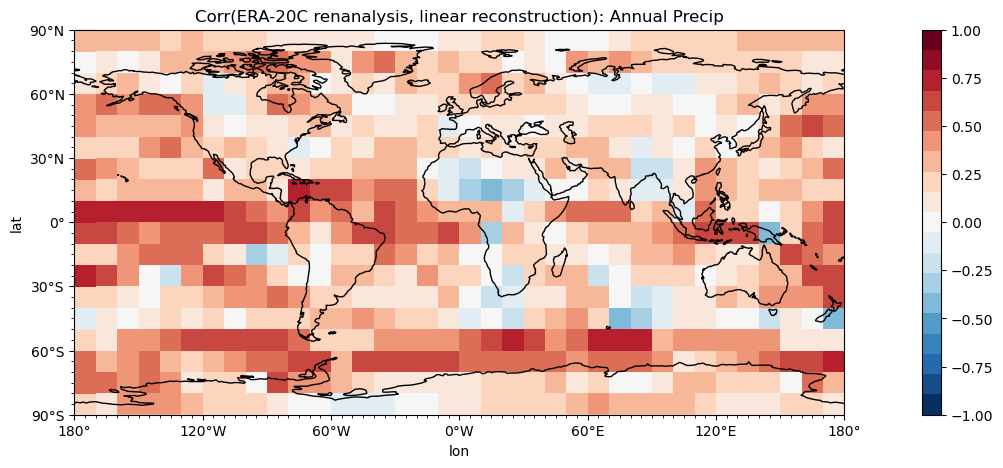

In [10]:
fig, ax = map_with_latlon()
fig.set_size_inches(20, 5)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
levels=np.linspace(-1, 1, num=20)
#ax.add_feature(cfeature.LAND, zorder=2, edgecolor='k', facecolor='white')
rvalues.plot(ax=ax, levels=levels, 
             cbar_kwargs={'location': 'right',
                         'ticks': np.arange(-1, 1.25, 0.25)})
#cbar.set_label('r value of reconstruction')
ax.set_title('Corr(ERA-20C renanalysis, linear reconstruction): Annual Precip')
#plt.savefig("correlation_nearest.svg")